In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import os

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["cmr10", "cmsy10"]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.grid"] = True

import Qubits

color_array = np.array(["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"])

In [25]:
ng_array = np.linspace(-2, 2, 200)
transmonC_E0 = np.zeros_like(ng_array)
transmonC_E1 = np.zeros_like(ng_array)
transmonC_E2 = np.zeros_like(ng_array)


transmonC = Qubits.transmon_charge(20, 0.2, 1, 0)

for i in range(len(ng_array)):
    transmonC.ng = ng_array[i]
    transmonC.solve()

    transmonC_E0[i] = transmonC.eigvals[0]
    transmonC_E1[i] = transmonC.eigvals[1]
    transmonC_E2[i] = transmonC.eigvals[2]

Text(0, 0.5, 'Energy')

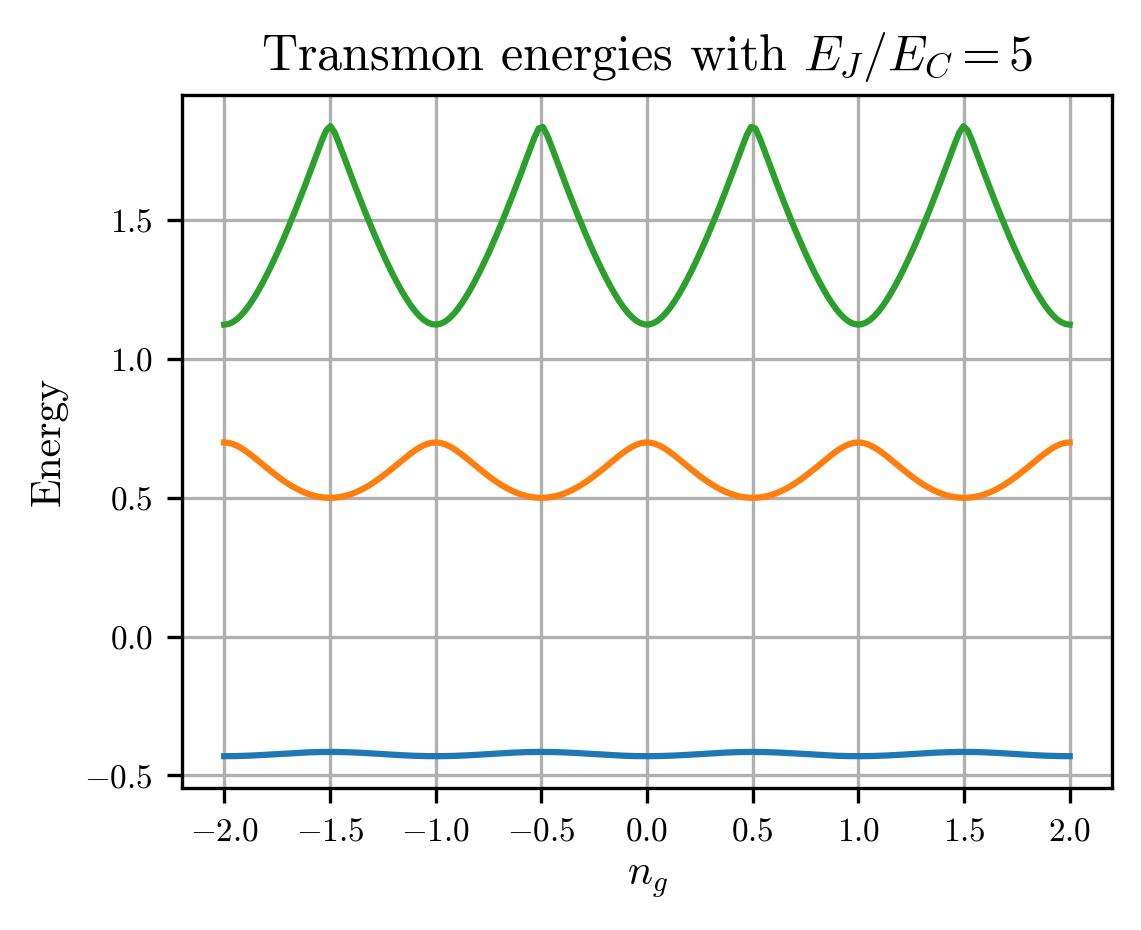

In [26]:
plt.plot(ng_array, transmonC_E0)
plt.plot(ng_array, transmonC_E1)
plt.plot(ng_array, transmonC_E2)
plt.title(r"Transmon energies with $E_J/E_C = 5$")
plt.xlabel(r"$n_g$")
plt.ylabel("Energy")

This plot is just to make sure that the code works as intended

In [27]:
gatemon = Qubits.gatemon_charge(20, 0.1, 1, 1, 0)
gatemonF = Qubits.gatemon_flux(60, 0.1, 1, 1, 0)

gatemon.solve()
gatemonF.solve()

print(gatemon.eigvals[:6])
print(gatemonF.eigvals[:6])

[-0.78973489 -0.30889226 -0.09327611  0.44868143  0.96129717  0.99941842]
[-0.7858968  -0.30107723 -0.07838683  0.4293342   0.96643848  1.0058312 ]


In [28]:
gatemon.verbose = True
gatemon.solve()

In [29]:
transmonC = Qubits.transmon_charge(20, 0.1, 1, 0)#(N, EC, EJ, ng)

transmonC.solve()

transmonF = Qubits.transmon_flux(100, 0.1, 1, 0)#(N, EC, EJ, ng)

transmonF.solve()

print(transmonC.eigvals[:6])
print(transmonF.eigvals[:6])

[-0.5800046   0.20994604  0.74491097  1.66482199  1.70965817  3.63588668]
[-0.57613871  0.21974425  0.75681909  1.67489756  1.71616914  3.63502718]


### Recreating figure 2.8 from Kringhøj's PhD thesis
The unusual expression inserted for $\Delta$ is because $E_J=\Delta T/4$ (see p. 25 in Kringhøjhs PhD thesis)

In [30]:
JoverC = 5

beta = 5

transmon = Qubits.transmon_flux(70, 1/beta, 1, 0.25) #(N, EC, EJ, ng)
gatemon1 = Qubits.gatemon_flux(70, 1*1/(beta*4), 1, 1, 0.25) #(N, EC, gap, T, ng)
gatemon09 = Qubits.gatemon_flux(70, 1*0.9/(beta*4), 1, 0.9, 0.25)
gatemon05 = Qubits.gatemon_flux(70, 1*0.5/(beta*4), 1, 0.5, 0.25)

if(True):
    gatemon1.beenakker = True
    gatemon09.beenakker = True
    gatemon05.beenakker = True

#Solve initially to find the energy normalisation
transmon.solve()
gatemon1.solve()
gatemon09.solve()
gatemon05.solve()

energy_transmon = np.zeros((3, len(ng_array)))
energy_gatemon1 = np.zeros((3, len(ng_array)))
energy_gatemon09 = np.zeros((3, len(ng_array)))
energy_gatemon05 = np.zeros((3, len(ng_array)))

#Defining the energy normalisation
transmon_energy_norm = transmon.eigvals[1]-transmon.eigvals[0]
gatemon1_energy_norm = gatemon1.eigvals[1]-gatemon1.eigvals[0]
gatemon09_energy_norm = gatemon09.eigvals[1]-gatemon09.eigvals[0]
gatemon05_energy_norm = gatemon05.eigvals[1]-gatemon05.eigvals[0]

#Setting a common zero point
transmon_0 = transmon.eigvals[0]
gatemon1_0 = gatemon1.eigvals[0]
gatemon09_0 = gatemon09.eigvals[0]
gatemon05_0 = gatemon05.eigvals[0]

In [31]:
for i in range(len(ng_array)):
    transmon.ng = ng_array[i]
    gatemon1.ng = ng_array[i]
    gatemon09.ng = ng_array[i]
    gatemon05.ng = ng_array[i]

    transmon.solve()
    gatemon1.solve()
    gatemon09.solve()
    gatemon05.solve()

    energy_transmon[:,i] = (transmon.eigvals[:3] - transmon_0)/transmon_energy_norm
    energy_gatemon1[:,i] = (gatemon1.eigvals[:3] - gatemon1_0)/gatemon1_energy_norm
    energy_gatemon09[:,i] = (gatemon09.eigvals[:3] - gatemon09_0)/gatemon09_energy_norm
    energy_gatemon05[:,i] = (gatemon05.eigvals[:3] - gatemon05_0)/gatemon05_energy_norm


C:\Users\marku\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 248 (\N{LATIN SMALL LETTER O WITH STROKE}) missing from current font.
  func(*args, **kwargs)
C:\Users\marku\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 248 (\N{LATIN SMALL LETTER O WITH STROKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


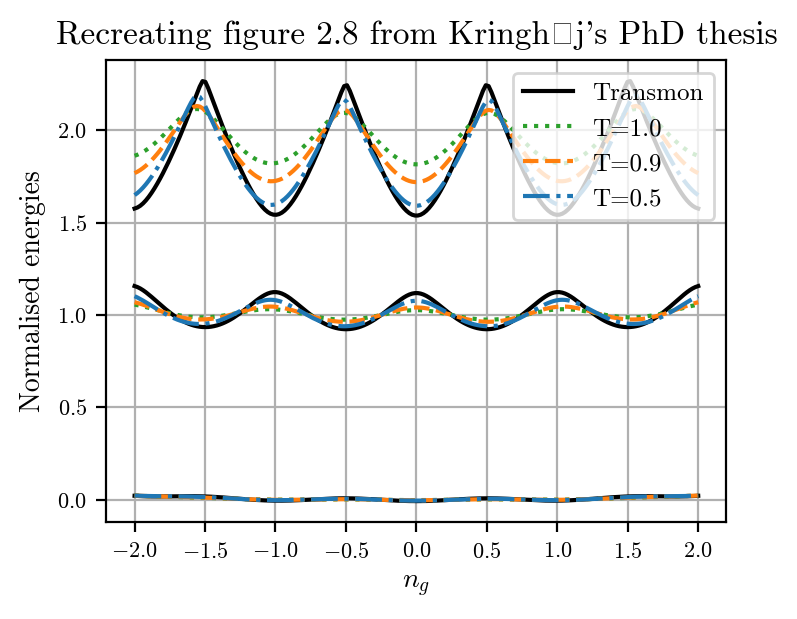

In [32]:
fig, ax = plt.subplots()

for i in range(3):
    line0, = ax.plot(ng_array, energy_transmon[i], color = "black")#Black
    line1, = ax.plot(ng_array, energy_gatemon1[i], ':', color = "C2")#Green
    line2, = ax.plot(ng_array, energy_gatemon09[i], '--', color = "C1")#Orange
    line3, = ax.plot(ng_array, energy_gatemon05[i], '-.', color = "C0")#Blue
    if(i == 0):
        line0.set_label("Transmon")
        line1.set_label("T=1.0")
        line2.set_label("T=0.9")
        line3.set_label("T=0.5")

ax.set(xlabel = r"$n_g$", ylabel = "Normalised energies", title = "Recreating figure 2.8 from Kringhøj's PhD thesis")
ax.legend()
fig.dpi = 200

I only get something that looks a bit like Kringhøj's plots if I use Beenakker's model

### Recreating figure 2.9 from Kringhøj's PhD thesis

In [33]:
T_array = np.linspace(0.01, 1, 200)

gatemonT_025 = Qubits.gatemon_flux(80, 1, 10, 1, 0.25)
gatemonT_0 = Qubits.gatemon_flux(80, 1, 10, 1, 0)

gatemonT_025.beenakker = True
gatemonT_0.beenakker = True

anharmonicity = np.zeros_like(T_array)
dispersion = np.zeros_like(T_array)


In [34]:
for i in range(len(T_array)):
    gatemonT_0.T = T_array[i]
    gatemonT_025.T = T_array[i]

    gatemonT_0.gap =  40/T_array[i] #This is to ensure that EJ/EC=10
    gatemonT_025.gap = 40/T_array[i]

    gatemonT_0.solve()
    gatemonT_025.solve()

    f01 = gatemonT_025.eigvals[1] - gatemonT_025.eigvals[0]
    f12 = gatemonT_025.eigvals[2] - gatemonT_025.eigvals[1]

    anharmonicity[i] = f01 - f12

    f01_0 = gatemonT_0.eigvals[1] - gatemonT_0.eigvals[0]
    dispersion[i] = (f01_0 - f01)

0.3102294163756376 1.0


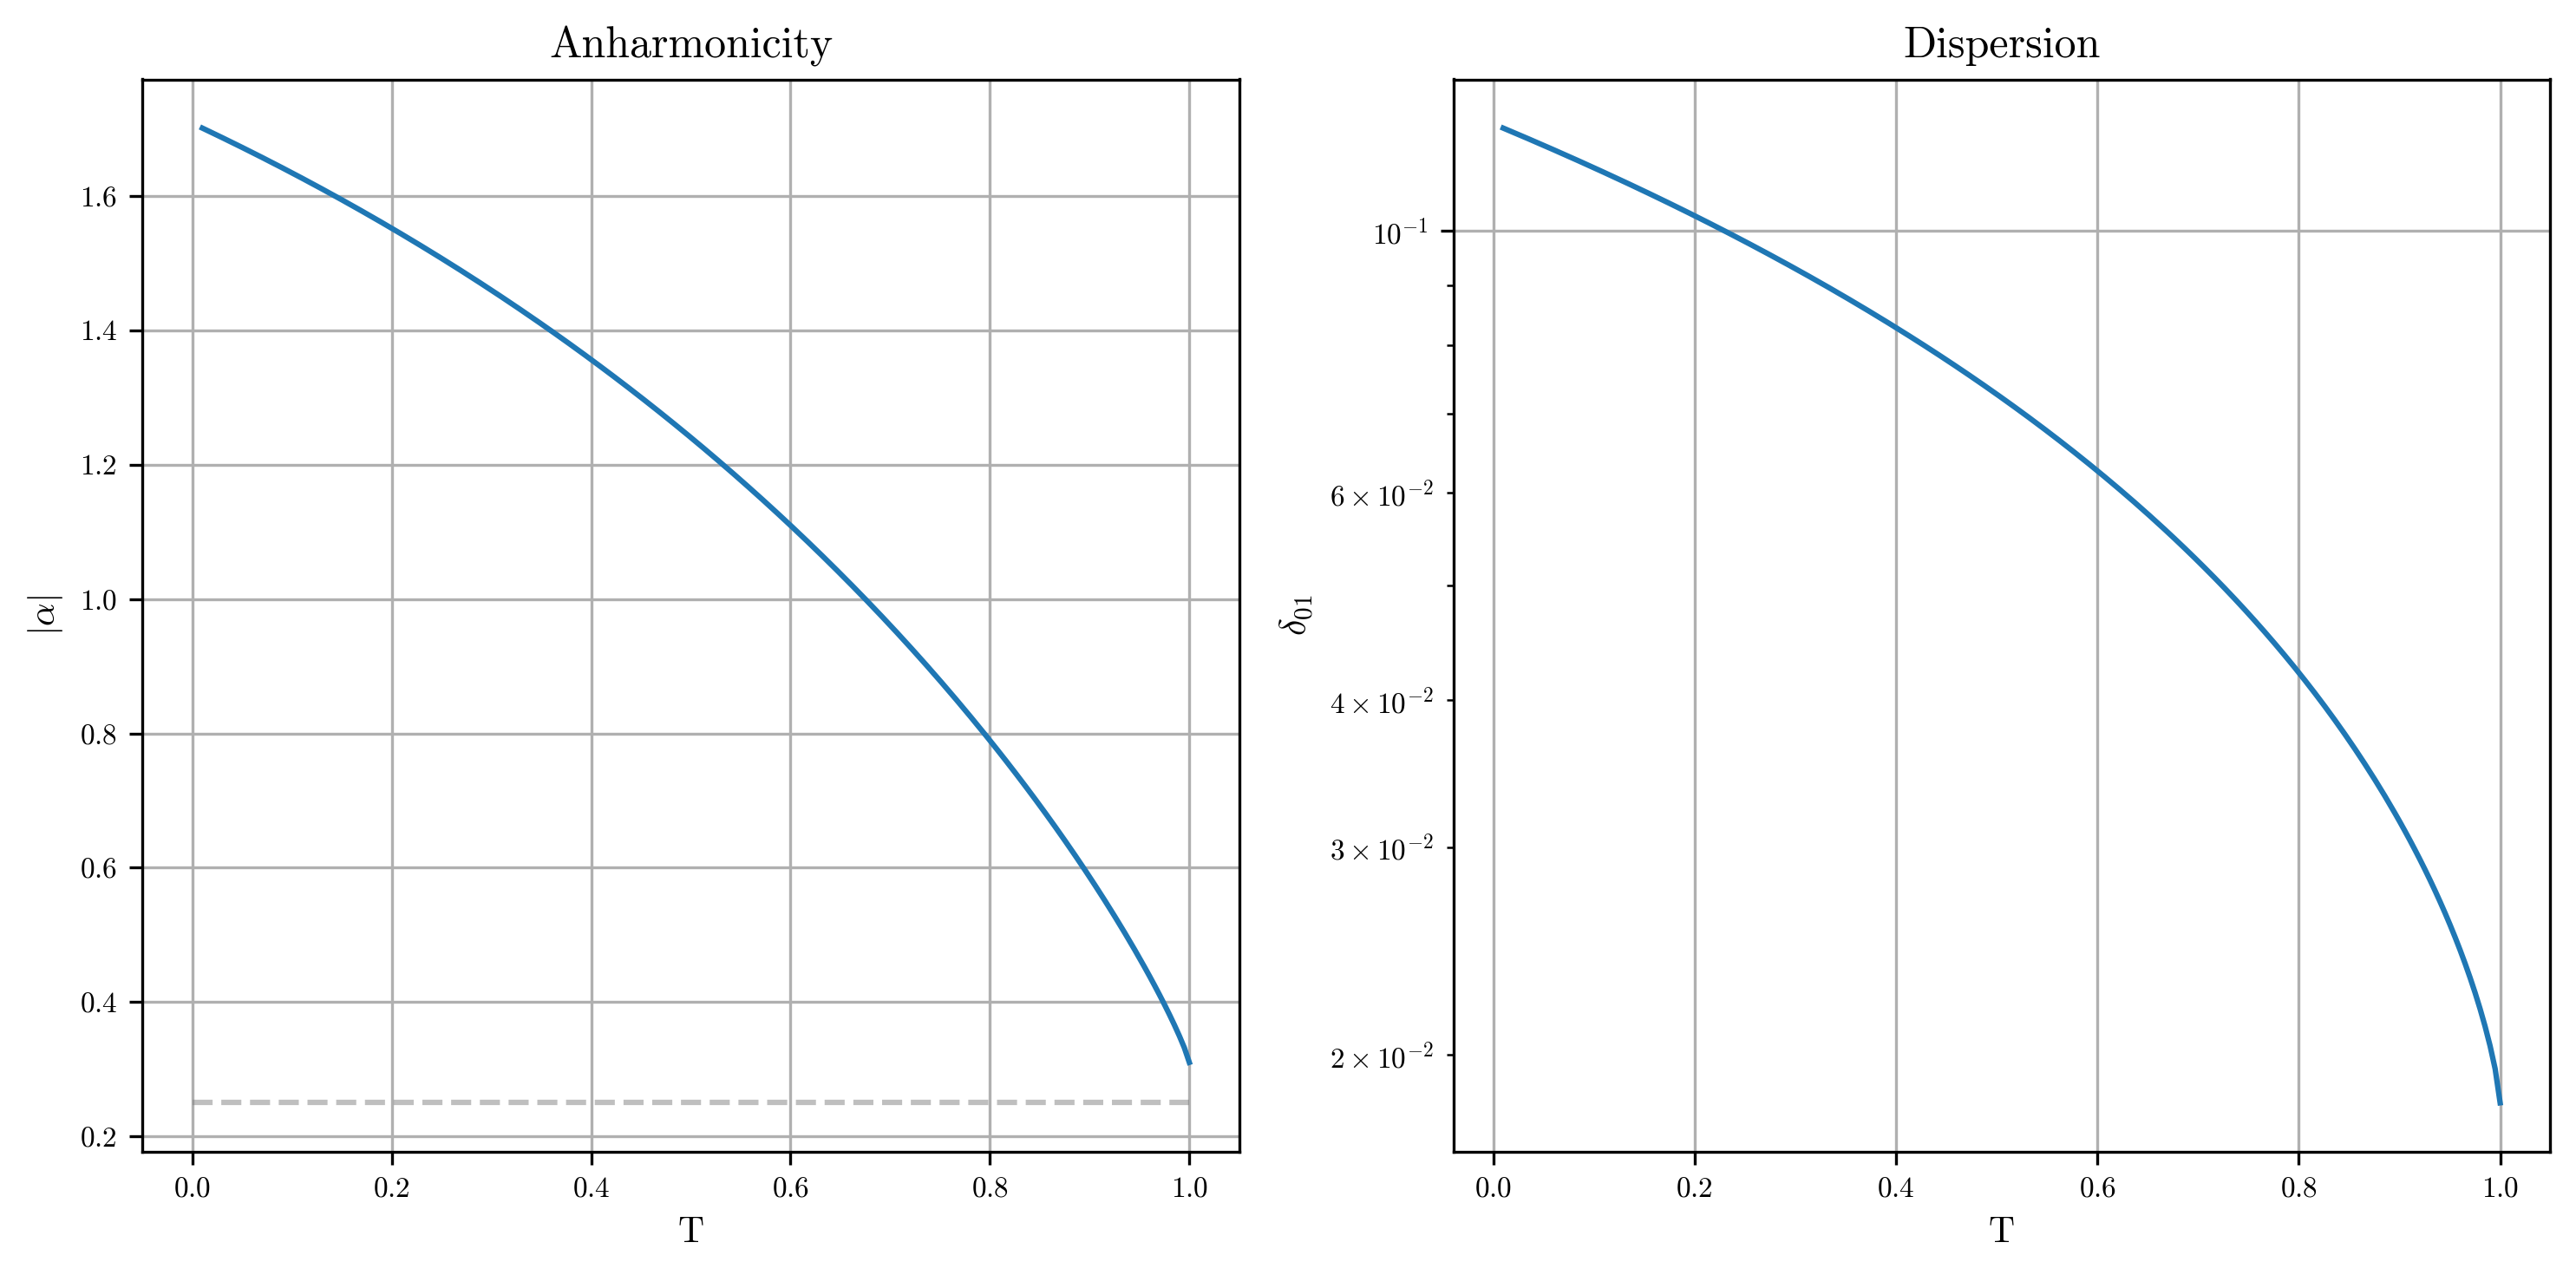

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(T_array, abs(anharmonicity))
ax1.plot([0, 1],[0.25, 0.25], '--', alpha = 0.5, color = "gray")
ax1.set(xlabel = "T", ylabel = r"$|\alpha|$", title = "Anharmonicity")

ax2.plot(T_array, dispersion)
ax2.set(yscale = "log", xlabel = "T", ylabel = r"$\delta_{01}$", title = "Dispersion")

fig.tight_layout()
print(abs(anharmonicity)[-1], T_array[-1])

## Comparing Models

In [36]:
T_array = np.linspace(0.01, 1, 50)

beta = 10
number_of_states = 5
ng = 0


transmon_reference = Qubits.transmon_charge(20, 1/beta, 1, ng)
gatemon_Averin = Qubits.gatemon_charge(20, 1/(4*beta), 1, 1, ng)#(N, EC, gap, T, ng)
gatemon_Beenakker = Qubits.gatemon_flux(100, 1/(4*beta), 1, 1, ng)
gatemon_Beenakker.beenakker = True

T_result_array = np.zeros((2, number_of_states, len(T_array)))

np.shape(T_result_array)

(2, 5, 50)

In [37]:
transmon_reference.solve()

transmon_limit = transmon_reference.eigvals[:number_of_states]


for i in range(len(T_array)):
    gatemon_Averin.T = T_array[i]
    gatemon_Averin.EC = 1/(beta)
    gatemon_Averin.gap = 4/T_array[i]
    gatemon_Averin.solve()

    T_result_array[0,:,i] = gatemon_Averin.eigvals[:number_of_states] + 4/T_array[i]*(1-T_array[i]/4) 

    gatemon_Beenakker.T = T_array[i]
    gatemon_Beenakker.EC = 1/(beta)
    gatemon_Beenakker.gap = 4/T_array[i]
    gatemon_Beenakker.solve()

    T_result_array[1,:,i] = gatemon_Beenakker.eigvals[:number_of_states] + 4/T_array[i]*(1-T_array[i]/4)



In [38]:
from matplotlib.lines import Line2D

.. is Averin and -- is Beenakker and solid is Transmon, beta=10


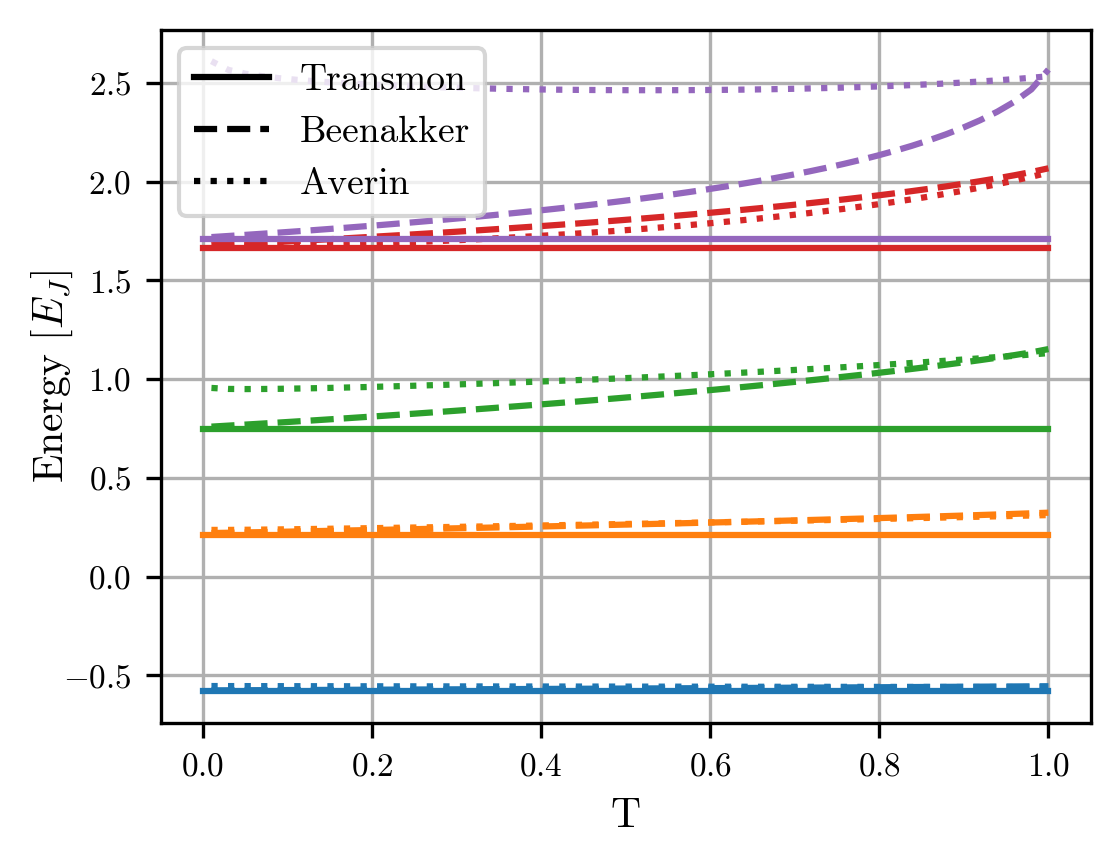

In [39]:
for i in range(number_of_states):
    plt.plot(T_array, T_result_array[0,i,:], ':', color = color_array[i])
    plt.plot(T_array, T_result_array[1,i,:], '--', color = color_array[i])
    plt.plot([0,1], [transmon_limit[i], transmon_limit[i]], color = color_array[i])

plt.xlabel("T")
plt.ylabel(r"Energy [$E_J$]", labelpad=-3)
#plt.title("The lowest 5 energies for Averins, Beenakker and the transmon")

plt.legend([Line2D([0],[0], color = "black"), Line2D([0],[0], color = "black", linestyle="--"), Line2D([0],[0], color = "black", linestyle=":")], ["Transmon", "Beenakker", "Averin"])

print(".. is Averin and -- is Beenakker and solid is Transmon, beta="+str(beta))

## Beta dependency

In [40]:
beta_array = np.linspace(1, 50, 100)
ng = 0
number_of_states = 3
T_values = np.array([0.01, 0.1, 0.5, 1.0])

beta_transmon = np.zeros((len(T_values), number_of_states, len(beta_array)))
beta_Averin = np.zeros((len(T_values), number_of_states, len(beta_array)))
beta_Beenakker = np.zeros((len(T_values), number_of_states, len(beta_array)))

transmon_reference = Qubits.transmon_charge(20, 1/beta, 1, ng)
gatemon_Averin = Qubits.gatemon_charge(20, 1/(4*beta), 1, 1, ng)#(N, EC, gap, T, ng)
gatemon_Beenakker = Qubits.gatemon_flux(100, 1/(4*beta), 1, 1, ng)
gatemon_Beenakker.beenakker = True


In [41]:
for i in range(len(T_values)):
    gatemon_Averin.T = T_values[i]
    gatemon_Averin.gap = 4/T_values[i]
    
    gatemon_Beenakker.T = T_values[i]
    gatemon_Beenakker.gap = 4/T_values[i]

    for j in range(len(beta_array)):
        transmon_reference.EC = 1/(beta_array[j])
        gatemon_Averin.EC = 1/(beta_array[j])
        gatemon_Beenakker.EC = 1/(beta_array[j])
        
        transmon_reference.solve()
        gatemon_Averin.solve()
        gatemon_Beenakker.solve()

        beta_transmon[i,:,j] = transmon_reference.eigvals[:number_of_states] 
        beta_Averin[i,:,j] = gatemon_Averin.eigvals[:number_of_states] + 4/T_values[i]*(1-T_values[i]/4)
        beta_Beenakker[i,:,j] = gatemon_Beenakker.eigvals[:number_of_states] + 4/T_values[i]*(1-T_values[i]/4)

The solid line is the transmon, the dotted line is Averin and the dashed line is Beenakker


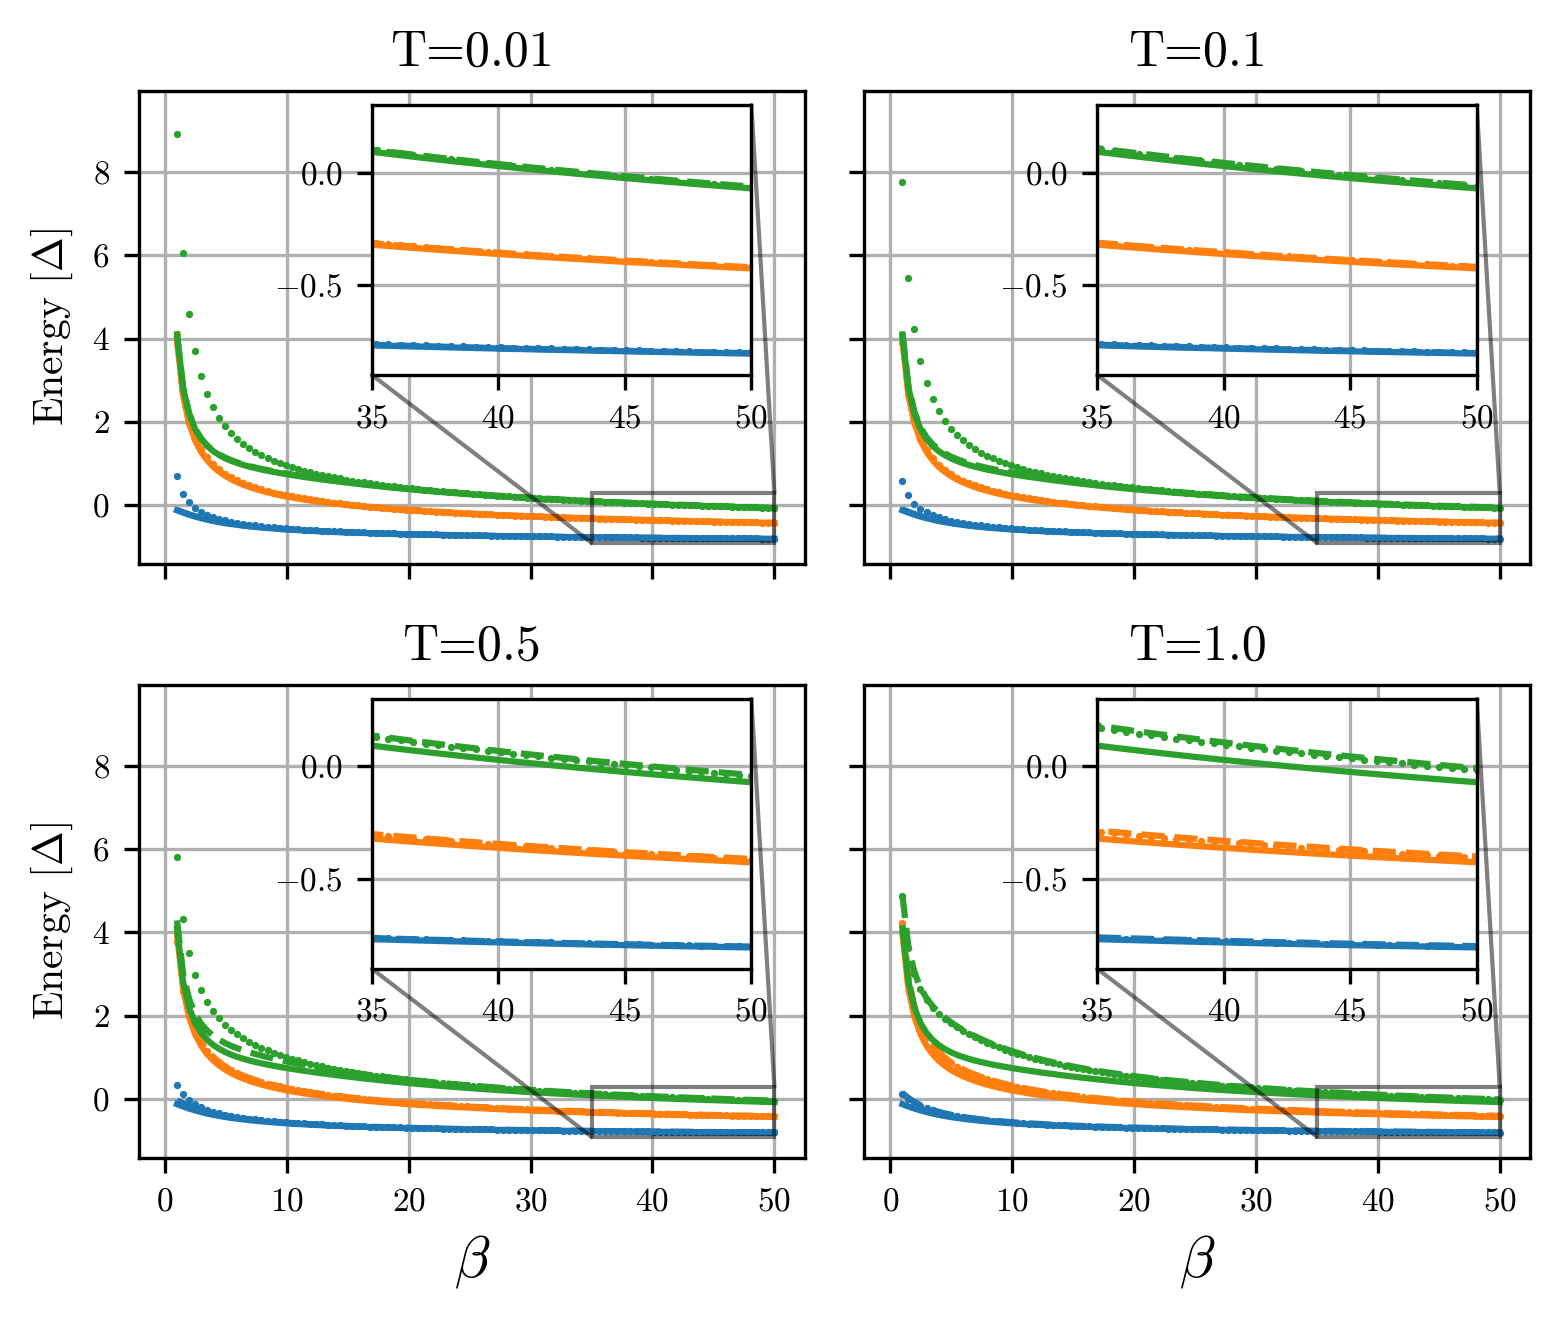

In [42]:
fig_beta, ax_beta = plt.subplots(2,2, figsize=(5.3, 4.5), sharex=True, sharey=True)

print("The solid line is the transmon, the dotted line is Averin and the dashed line is Beenakker")

for m in range(2):
    for n in range(2):
        T_plot = T_values[n + m*2]

        axins = ax_beta[m, n].inset_axes([0.35, 0.4, 0.57, 0.57], xlim=(35,50), ylim=(-0.9,0.3))#, xticklabels=[35, 50], yticklabels=[-0.9,0.3])
        ax_beta[m, n].indicate_inset_zoom(axins, edgecolor="black")
        
        for i in range(number_of_states):
            ax_beta[m, n].plot(beta_array, beta_transmon[n + m*2, i, :], color = color_array[i])
            ax_beta[m, n].plot(beta_array, beta_Averin[n + m*2, i, :], '.', color = color_array[i], markersize = 1.5)
            ax_beta[m, n].plot(beta_array, beta_Beenakker[n + m*2, i, :], '--', color = color_array[i])
            ax_beta[m, n].set(title = r"T="+str(T_values[n + m*2]))# xlabel = r"$\beta$", ylabel = "Energy")
            #ax_beta[m, n].grid()
            ax_beta[m, n].xaxis.label.set_size(14)

            axins.plot(beta_array, beta_transmon[n + m*2, i, :], color = color_array[i])
            axins.plot(beta_array, beta_Averin[n + m*2, i, :], '.', color = color_array[i], markersize = 1.5)
            axins.plot(beta_array, beta_Beenakker[n + m*2, i, :], '--', color = color_array[i])
            #axins.grid()
            #ax_beta[m, n].set_ylim(top=4)

ax_beta[0,0].set(ylabel = r"Energy [$\Delta$]")
ax_beta[1,1].set(xlabel = r"$\beta$")
ax_beta[1,0].set(xlabel = r"$\beta$", ylabel = r"Energy [$\Delta$]")
plt.tight_layout()
#plt.suptitle("Energies at four different transmission coefficents", y=1.02, size = 18)

## Anharmonicity
I can't do relative anharmonicity, only absolute anharmonicity because I've added an off-set to some of the values

In [43]:
#Removing the off-set from Beenakker and Averin so I can calculate the relative anharmonicity
beta_transmon_rescaled = np.zeros_like(beta_transmon)
beta_Averin_rescaled = np.zeros_like(beta_Averin)
beta_Beenakker_rescaled = np.zeros_like(beta_Beenakker)
print(np.shape(beta_transmon))

beta_transmon_rescaled = beta_transmon

for i in range(len(T_values)):
    for j in range(number_of_states):
        beta_Averin_rescaled[i,j,:] = beta_Averin[i,j,:] - 4/T_values[i]*(1-T_values[i]/4)*np.ones_like(beta_array)
        beta_Beenakker_rescaled[i,j,:] = beta_Beenakker[i,j,:] - 4/T_values[i]*(1-T_values[i]/4)*np.ones_like(beta_array)

(4, 3, 100)


In [44]:
transmon_anharmonicity = np.zeros((len(T_values), len(beta_array)))
Averin_anharmonicity = np.zeros((len(T_values), len(beta_array)))
Beenakker_anharmonicity = np.zeros((len(T_values), len(beta_array)))


for i in range(len(T_values)):
    transmon_anharmonicity[i] = ((beta_transmon_rescaled[i, 2, :] - beta_transmon_rescaled[i, 1, :]) - (beta_transmon_rescaled[i, 1, :] - beta_transmon_rescaled[i, 0, :]))/(beta_transmon_rescaled[i, 1, :] - beta_transmon_rescaled[i, 0, :])
    Averin_anharmonicity[i] = ((beta_Averin_rescaled[i, 2, :] - beta_Averin_rescaled[i, 1, :]) - (beta_Averin_rescaled[i, 1, :] - beta_Averin_rescaled[i, 0, :]))/(beta_Averin_rescaled[i, 1, :] - beta_Averin_rescaled[i, 0, :])
    Beenakker_anharmonicity[i] = ((beta_Beenakker_rescaled[i, 2, :] - beta_Beenakker_rescaled[i, 1, :]) - (beta_Beenakker_rescaled[i, 1, :] - beta_Beenakker_rescaled[i, 0, :]))/(beta_Beenakker_rescaled[i, 1, :] - beta_Beenakker_rescaled[i, 0, :])


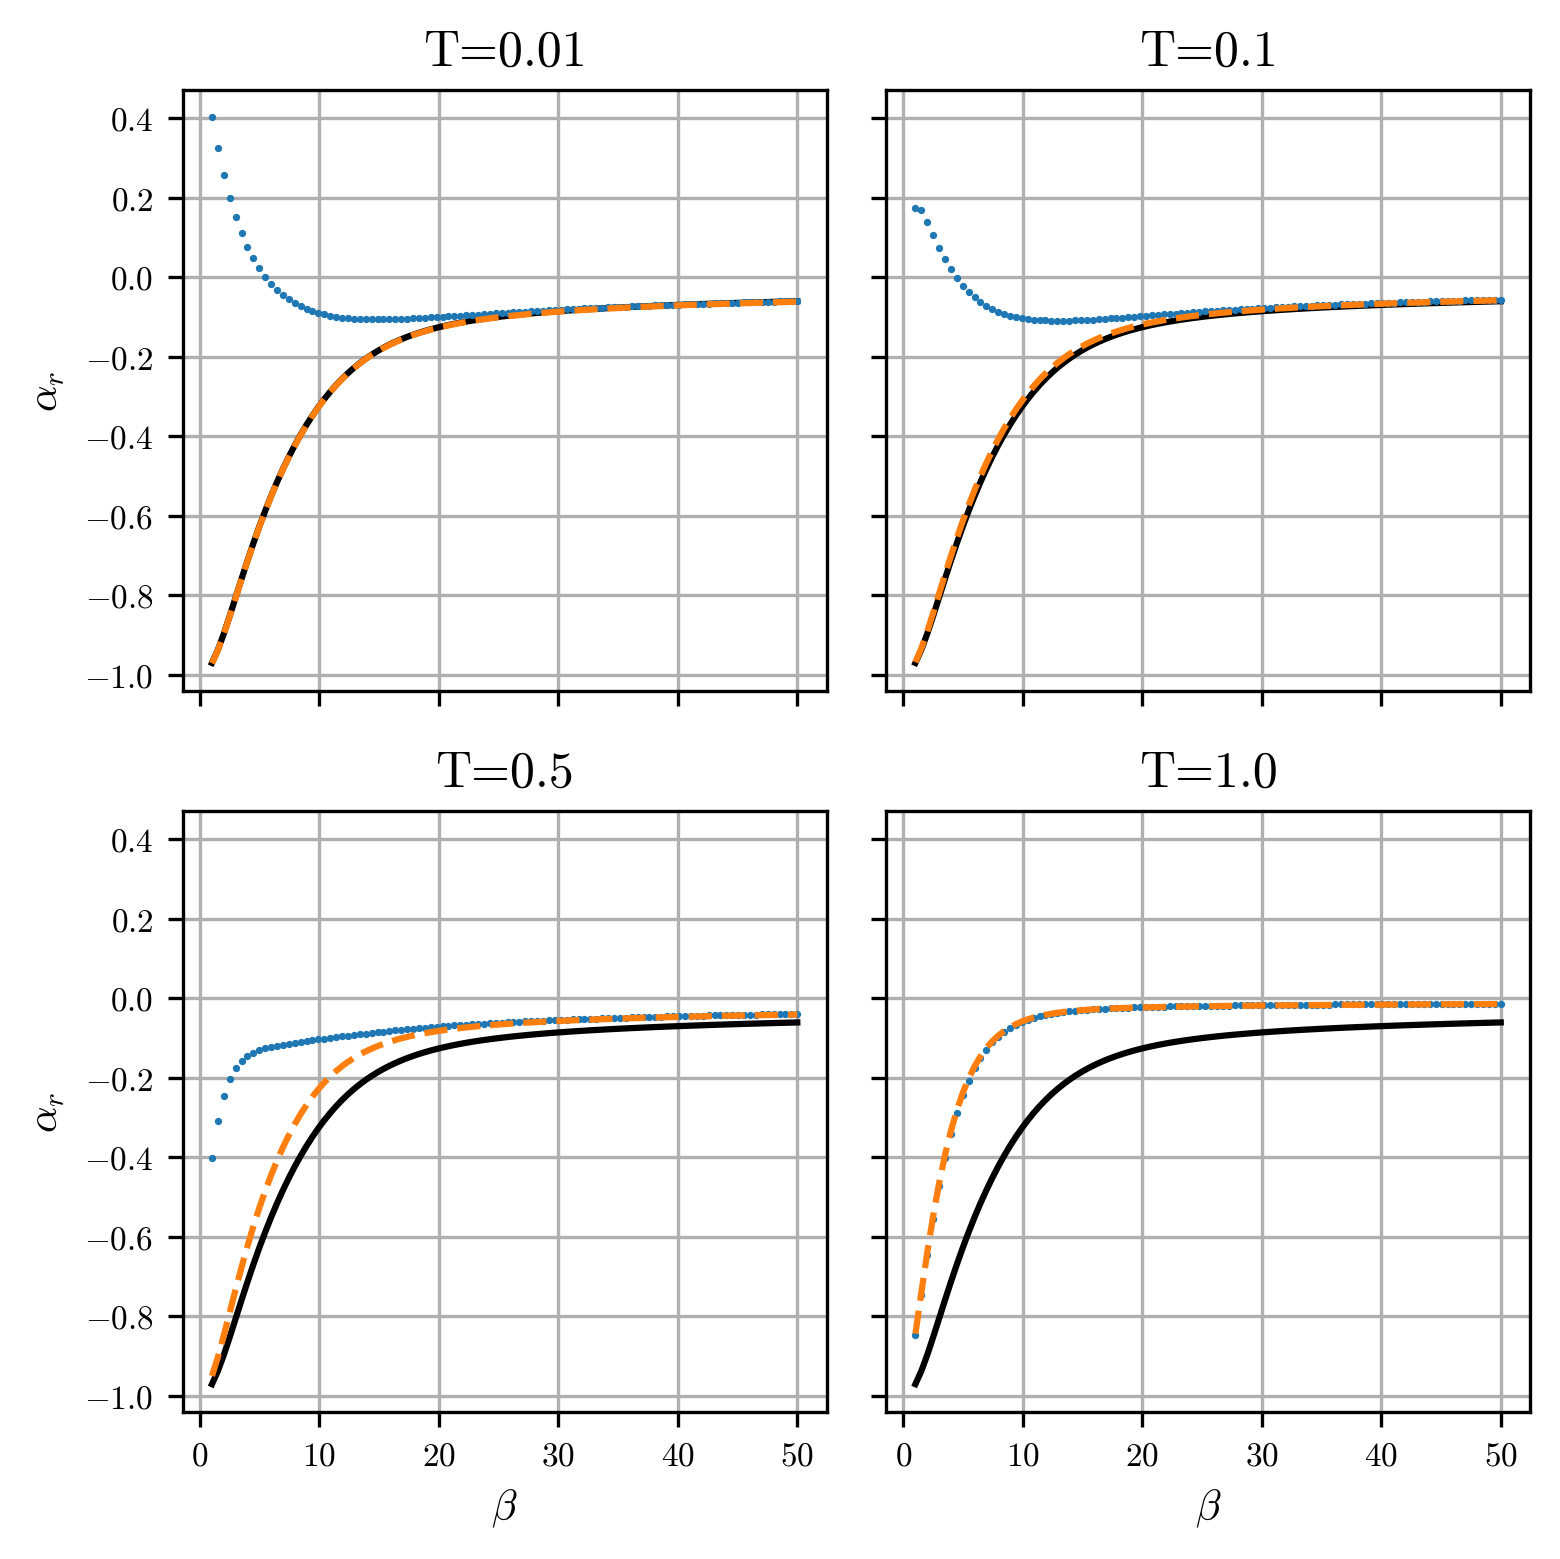

In [45]:
fig_beta, ax_beta = plt.subplots(2,2, figsize=(5.3, 5.3), sharex=True, sharey=True)

T_index = 0

for m in range(2):
    for n in range(2):
        
        ax_beta[m, n].plot(beta_array, transmon_anharmonicity[n + m*2, :], color = "black")
        ax_beta[m, n].plot(beta_array, Averin_anharmonicity[n + m*2, :], '.', color = color_array[0], markersize = 1.5)
        ax_beta[m, n].plot(beta_array, Beenakker_anharmonicity[n + m*2, :], '--', color = color_array[1])
        ax_beta[m, n].set(title = "T="+str(T_values[n + m*2]))#, xlabel = r"$\beta$", ylabel = r"$\alpha_r$")

ax_beta[0,0].set(ylabel = r"$\alpha_r$")
ax_beta[1,1].set(xlabel = r"$\beta$")
ax_beta[1,0].set(xlabel = r"$\beta$", ylabel = r"$\alpha_r$")

plt.tight_layout()
#plt.suptitle("Relative anharmonicity", y=1.02)